In [1]:
import pandas as pd
X =pd.DataFrame([
    [5.9,3.2],
    [4.6,2.9],
    [6.2,2.8],
    [4.7,3.2],
    [5.5,4.2],
    [5.0,3.0],
    [4.9,3.1],
    [5.1,3.8],
    [6.0,3.0]
])

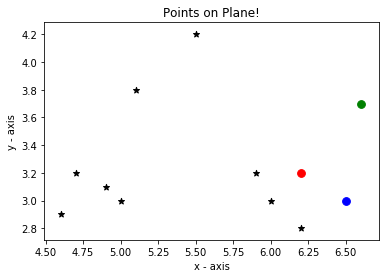

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[0], X[1], label= "stars",marker="*",color= "black", s=40) 
plt.scatter(6.2, 3.2, c='red',s=60)
plt.scatter(6.6,3.7,c='green',s=60)
plt.scatter(6.5, 3.0, c='blue',s=60)
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
 
plt.title('Points on Plane!') 
  
# function to show the plot 
plt.show() 

In [9]:
mean1 = [6.2,3.2]
mean2 = [6.6,3.7]
mean3 = [6.5,3.0]
X['cluster'] = 0

In [10]:
X.iloc[:,0:2]

,0,1
0,5.9,3.2
1,4.6,2.9
2,6.2,2.8
3,4.7,3.2
4,5.5,4.2
5,5.0,3.0
6,4.9,3.1
7,5.1,3.8
8,6.0,3.0


In [11]:
import numpy as np
from scipy.spatial import distance
res = pd.DataFrame()
y = str(list(X['cluster']))
#print(y)
i = 0
while(True):
    X['dis_from_m1'] =  np.sqrt((X.loc[:,0]-mean1[0])**2 + (X.loc[:,1]-mean1[1])**2) 
    
    X['dis_from_m2'] =  np.sqrt((X.loc[:,0]-mean2[0])**2 + (X.loc[:,1]-mean2[1])**2) 
    
    X['dis_from_m3'] =  np.sqrt((X.loc[:,0]-mean3[0])**2 + (X.loc[:,1]-mean3[1])**2) 
    
    X['min_dis'] = np.amin(X.loc[:,['dis_from_m1','dis_from_m2','dis_from_m3']], axis=1) 
    
    label1_after = X['min_dis'] == X['dis_from_m1']
    
    label2_after = X['min_dis'] == X['dis_from_m2']
    
    label3_after = X['min_dis'] == X['dis_from_m3']
    
    X.at[label2_after,'cluster'] = 2
    
    X.at[label3_after,'cluster'] = 3
    
    X.at[label1_after,'cluster'] = 1
    
    if(i==1):
        res['mean1_after_first'] = round(mean1,2)
    if(i==2):
        res['mean2_after_second'] = round(mean2,2)
        
    mean1 = np.mean(X.loc[X['cluster']==1,[0,1]],axis=0)
    
    mean2 = np.mean(X.loc[X['cluster']==2,[0,1]],axis=0)
    
    mean3 = np.mean(X.loc[X['cluster']==3,[0,1]],axis=0)
    
    l = str(list(X['cluster']))
    
    if l == y:
        break
        
    y = str(list(X['cluster']))
    
    i = i+1
res['third_mean_after_conv'] = round(mean3,2)
res['iterations'] = i
#print(l)
#print(y)
#print(X)
res.index = ['x','y']
res = pd.DataFrame(res)
print(res)

   mean1_after_first  mean2_after_second  third_mean_after_conv  iterations
x               5.17                 5.3                   6.03           2
y               3.17                 4.0                   3.00           2


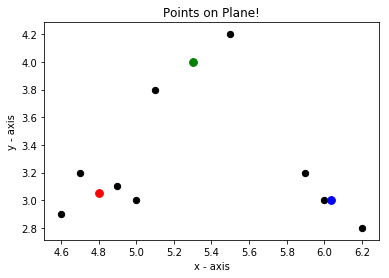

In [12]:
plt.scatter(X[0], X[1], label= "stars",color= "black", s=40) 
plt.scatter(mean1[0], mean1[1], c='red',s=60)
plt.scatter(mean2[0],mean2[1],c='green',s=60)
plt.scatter(mean3[0], mean3[1], c='blue',s=60)
plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
 
plt.title('Points on Plane!') 
  
# function to show the plot 
plt.show()